# Ad Click Prediction

In this notebook, we will be analyzing ad click data from [Kaggle](https://www.kaggle.com/datasets/marius2303/ad-click-prediction-dataset) and building a prediction model.

***

# Initialization

Importing libraries, data etc...

In [1]:
# Setting PYTHONHASHSEED
import os

pyhashseed1 = os.environ.get('PYTHONHASHSEED')
os.environ['PYTHONHASHSEED'] = '0'
pyhashseed2 = os.environ.get('PYTHONHASHSEED')

# NOTEBOOK EXCLUSIVE CODE
if __name__ == "__main__":
    print('Make sure the following says \'None\': ', pyhashseed1)
    print('Make sure the following says \'0\': ', pyhashseed2)

Make sure the following says 'None':  None
Make sure the following says '0':  0


In [3]:
# Importing libraries
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

# Setting seed
np.random.seed(42)

In [32]:
# Displaying + saving plot function
IMAGES_PATH = Path() / 'plots'

def save_fig(fig_name, tight_layout=True, fig_extension='png', resolution=300):
    '''Saves an image to the plots folder with the specified name.'''
    path = IMAGES_PATH / f'{fig_name}.{fig_extension}'
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def plot_show(plt_name):
    '''Saves an image using save_fig() under the plt_name and displays it.'''
    save_fig(plt_name)
    plt.show()

In [5]:
# Import data
adclicks = pd.read_csv("data/ad_click_dataset.csv")

***

# EDA + Splitting Data

This section will be a comprehensive analysis and cleaning of the data. We will examine its structure, remove redundant data, and examine relationships. We will also split the data into the training and test set.

## Data Overview

Structure of the dataset, % of missing/duplicate values etc..

In [6]:
# Grab a quick snapshot
adclicks.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [7]:
# Evaluate duplicate values
duplicates = adclicks.duplicated()
print("There are", len(adclicks[duplicates]), "duplicate rows.")

# Drop duplicates
adclicks = adclicks.drop_duplicates()
print("The duplicate rows have been dropped. There are", len(adclicks), "rows remaining.")

There are 2853 duplicate rows.
The duplicate rows have been dropped. There are 7147 rows remaining.


In [8]:
# General information
adclicks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7147 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7147 non-null   int64  
 1   full_name         7147 non-null   object 
 2   age               3671 non-null   float64
 3   gender            3747 non-null   object 
 4   device_type       5419 non-null   object 
 5   ad_position       5404 non-null   object 
 6   browsing_history  3667 non-null   object 
 7   time_of_day       5435 non-null   object 
 8   click             7147 non-null   int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 558.4+ KB


## Data Cleaning + Data Visualization

Evaluate missing values and think about how to deal with them. Visualize distributions of features and conduct initial visual analysis.

### Missing Data

Examining missing values and thinking about how to deal with the missingness.

In [9]:
# How many missing values in each feature?
missing = adclicks.isna().sum()
display(missing)

# How many rows with missing values?
missing_rows_count = adclicks.isnull().any(axis=1).sum()
print(f"Number of rows with missing data: {missing_rows_count}")

id                     0
full_name              0
age                 3476
gender              3400
device_type         1728
ad_position         1743
browsing_history    3480
time_of_day         1712
click                  0
dtype: int64

Number of rows with missing data: 6707


/var/folders/vd/7yzb859x5958jxfslq9bq57r0000gn/T/ipykernel_4619/3448217962.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


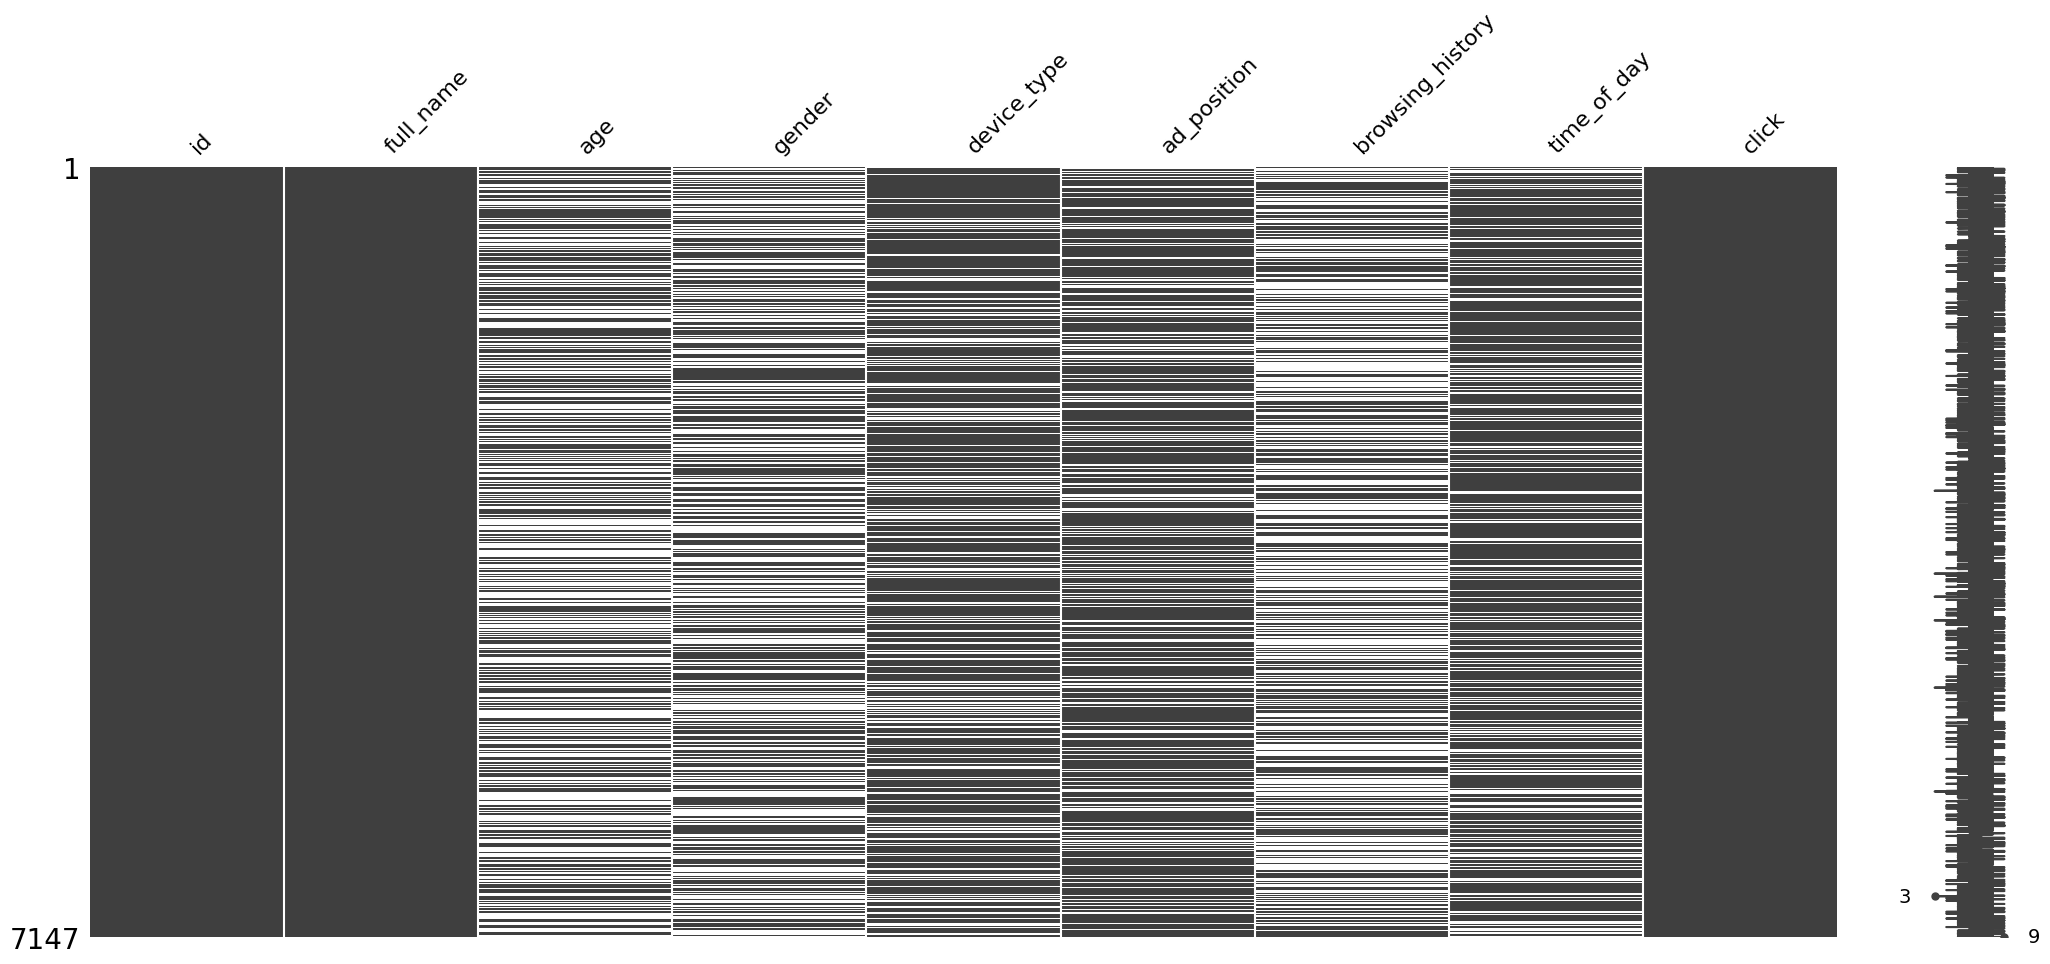

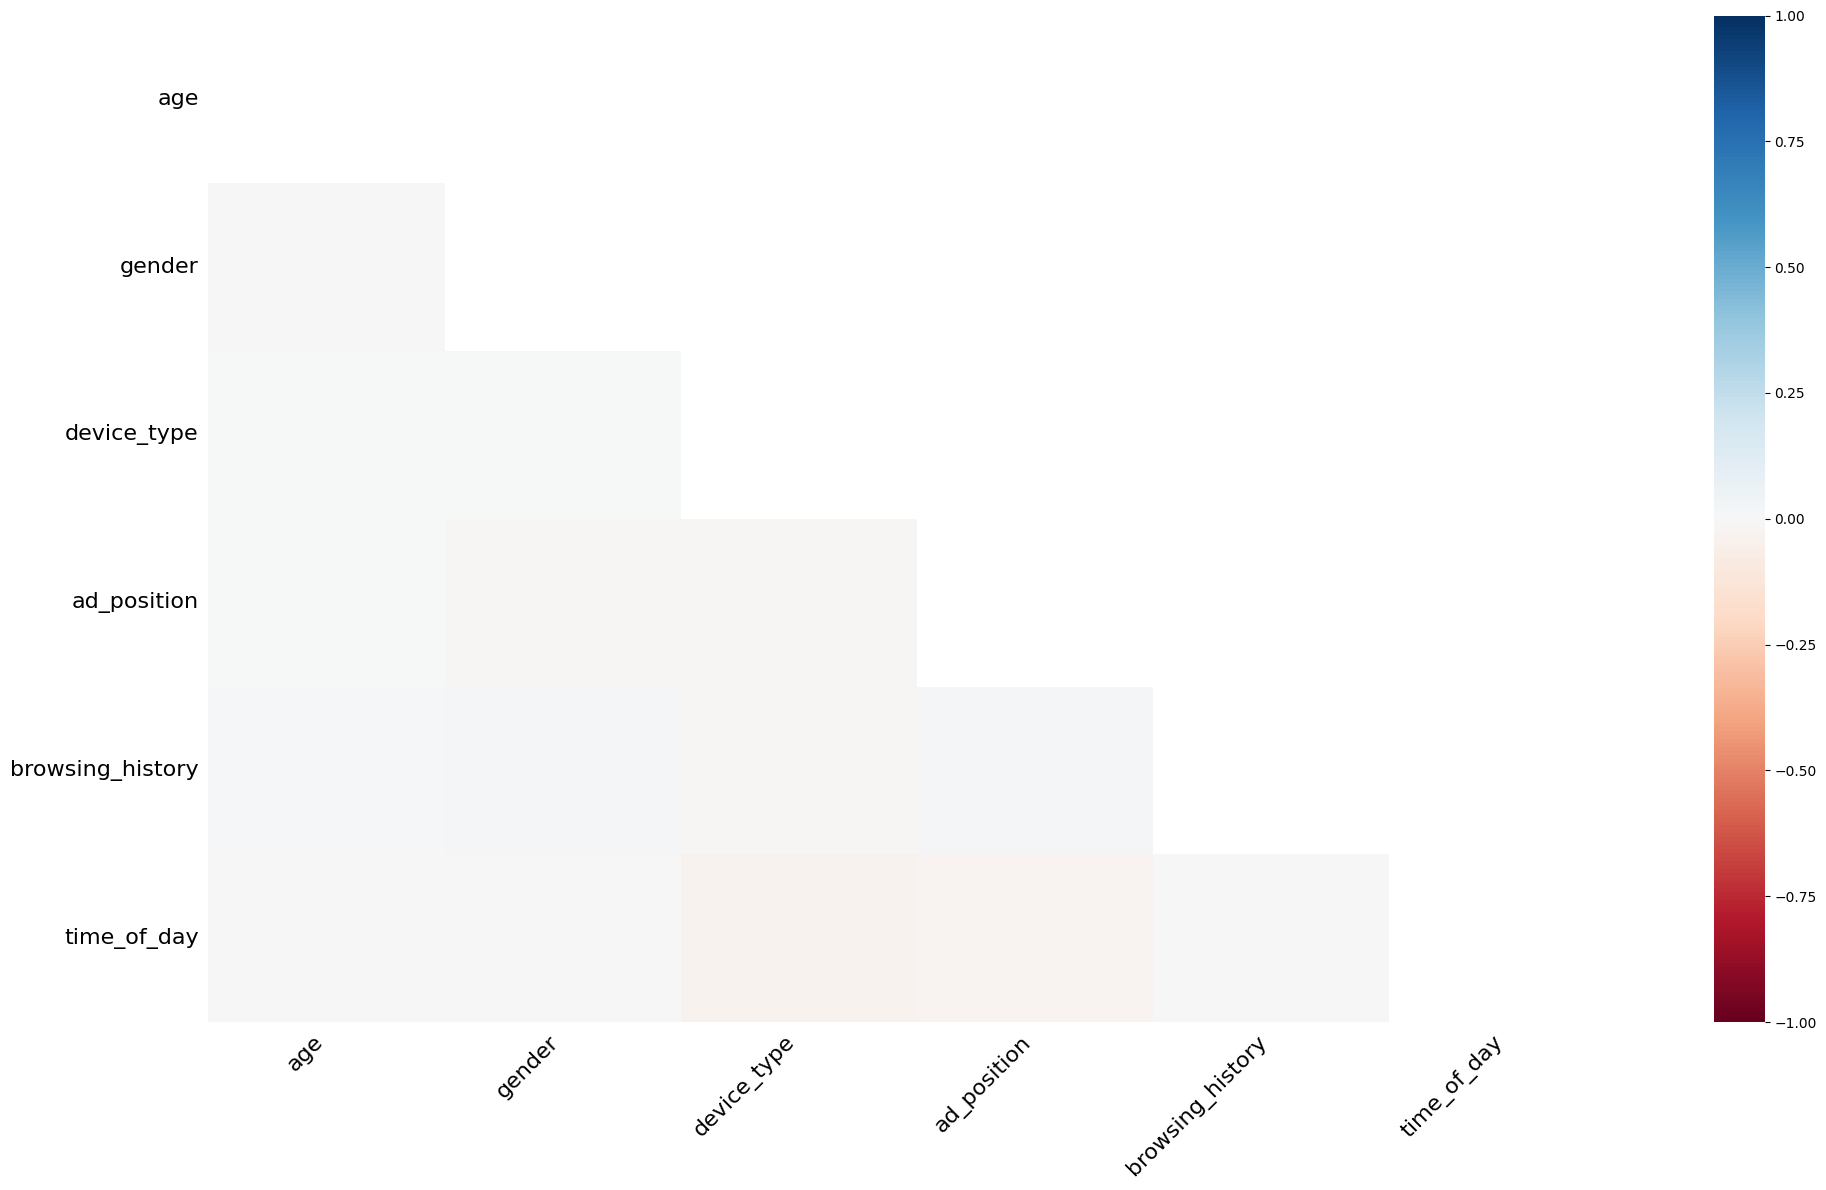

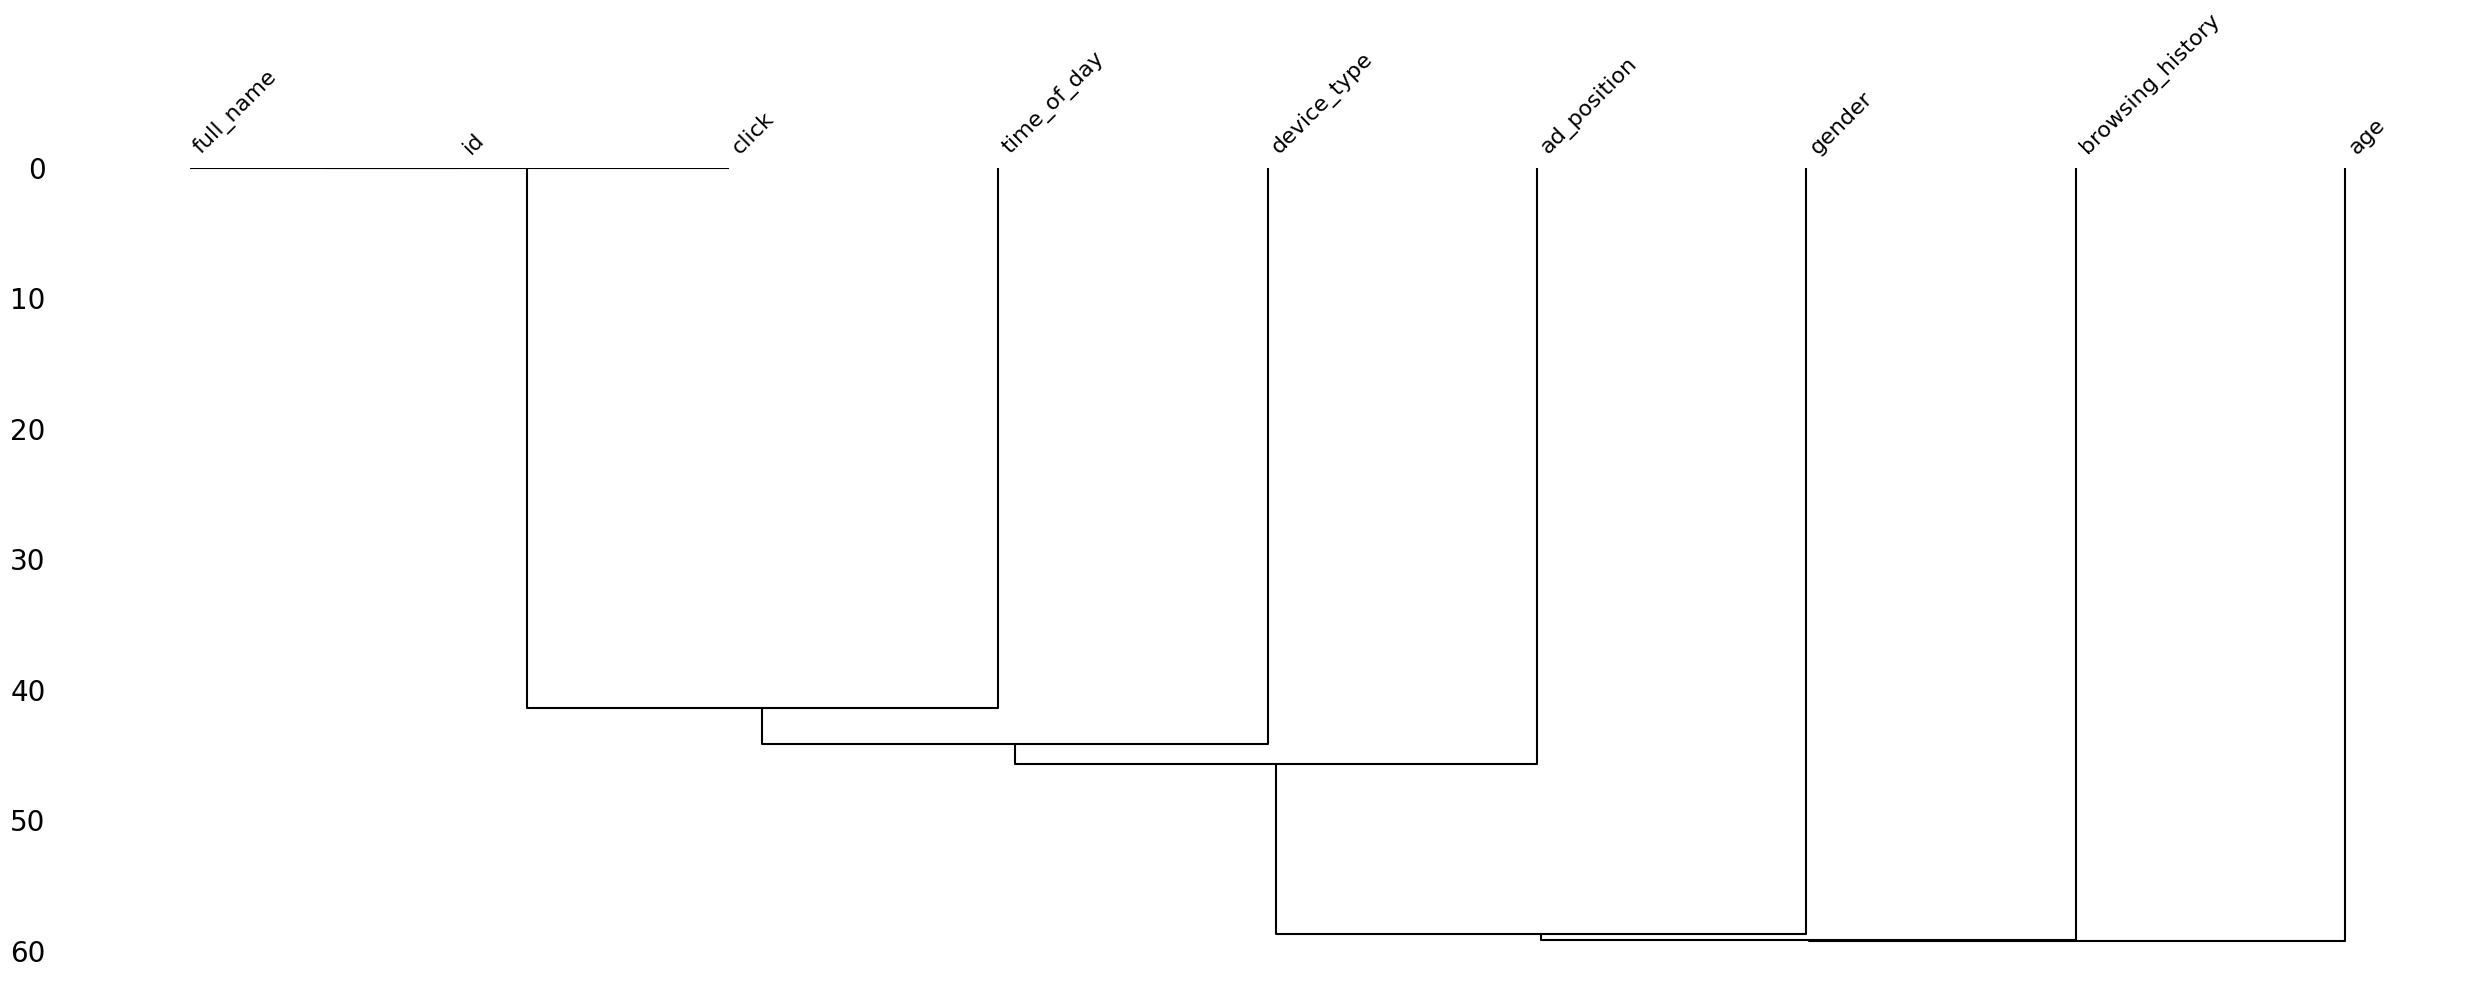

In [10]:
import missingno as msno

# Check pattern of missingness

# Missing matrix
msno.matrix(adclicks)
plt_show("missing_matrix")

# Nullity correlation heatmap
msno.heatmap(adclicks)
plt_show("nullity_corr_heatmap")

# Dendrogram
msno.dendrogram(adclicks)
plt_show("missing_dendrogram")

### Examining Unique Values

Examine the unique values of the categorical features and if any of the columns can serve as a row ID.

In [11]:
# Extract categorical columns
categorical = adclicks.select_dtypes(include=["object", "category", "bool"])

# Display unique values in each categorical column
for feature in categorical:
    print(f"{feature}: " ,list(categorical[feature].unique()))

full_name:  ['User670', 'User3044', 'User5912', 'User5418', 'User9452', 'User5942', 'User7808', 'User5065', 'User7993', 'User4509', 'User2595', 'User7466', 'User8171', 'User2023', 'User973', 'User7529', 'User8127', 'User188', 'User2124', 'User7335', 'User5569', 'User2272', 'User2722', 'User316', 'User9789', 'User4890', 'User4994', 'User5055', 'User6724', 'User8253', 'User4945', 'User1729', 'User6862', 'User4985', 'User7361', 'User1524', 'User2542', 'User119', 'User5881', 'User9642', 'User1171', 'User1612', 'User9586', 'User7661', 'User4228', 'User5574', 'User120', 'User6143', 'User301', 'User5301', 'User5439', 'User9806', 'User9888', 'User4525', 'User6153', 'User7498', 'User9736', 'User2244', 'User4952', 'User4855', 'User9590', 'User813', 'User4957', 'User9431', 'User6935', 'User2431', 'User3164', 'User4756', 'User7674', 'User6251', 'User6751', 'User9996', 'User2973', 'User6315', 'User7065', 'User9412', 'User3458', 'User6121', 'User487', 'User3266', 'User6553', 'User8996', 'User503', '

In [12]:
# Unique number of `id` and `full_name`
print(adclicks["id"].nunique())
print(adclicks["full_name"].nunique())

4000
4000


In [13]:
# Dropping `full_name`
adclicks = adclicks.drop(columns="full_name")

## Examining Recurring Users

Since we have recurring users, we are going to quickly examine their effect on the data to determine the best method of splitting.

In [14]:
# Extract recurring users
# Count `id` occurrences
id_counts = adclicks["id"].value_counts()
print(f"The maximum number of times a user occurs is {id_counts.max()}.")

# Separate recurring users and single users
recurring_ids = id_counts[id_counts > 1].index
recurring_users = adclicks[adclicks["id"].isin(recurring_ids)]
single_users = adclicks[~adclicks["id"].isin(recurring_ids)]

# Count occurrences of each
print(f"Total number of recurring users: {recurring_users["id"].nunique()}")
print(f"Total number of single users: {single_users["id"].nunique()}")

The maximum number of times a user occurs is 14.
Total number of recurring users: 500
Total number of single users: 3500


In [15]:
# Describe each dataset
print("Single User Statistics")
display(single_users.describe())
print("Recurring User Statistics")
display(recurring_users.describe())

Single User Statistics


,id,age,click
count,3500.000000,1883.000000,3500.0
mean,5022.290571,41.634095,0.0
std,2891.171737,13.472270,0.0
min,5.000000,18.000000,0.0
25%,2529.000000,30.000000,0.0
50%,5020.500000,42.000000,0.0
75%,7525.500000,53.000000,0.0
max,10000.000000,64.000000,0.0


Recurring User Statistics


,id,age,click
count,3647.000000,1788.000000,3647.0
mean,5060.473540,38.975951,1.0
std,2841.322173,12.802883,0.0
min,7.000000,18.000000,1.0
25%,2529.000000,28.000000,1.0
50%,5301.000000,38.000000,1.0
75%,7376.000000,49.250000,1.0
max,9992.000000,64.000000,1.0


## Distribution of Categorical Features

We will examine the distribution of the whole dataset and the users by category of occurrence.

In [30]:
# Function to create plot grid of barplots
def plot_barplots(dataframes, dataframe_names, features, colors):
    '''A function that outputs a grid of barplots.'''
    
    num_df = len(dataframes)
    num_features = len(features)
    
    # Each figure will be 6 by 4
    fig, axes = plt.subplots(num_features, num_df, figsize=(6*num_df, 4*num_features), sharey=True)
    
    # Iterate through and plot figures
    for i, ax in enumerate(axes.flatten()):
        # Gather data
        df = dataframes[i % num_df]
        df_name = dataframe_names[i % num_df]
        feature = features[i // num_df]
        feature_name = feature.capitalize()
        color = colors[i // num_df]
        
        # Configure data for sns
        counts = df[feature].value_counts(dropna=False).reset_index()
        counts.columns = [feature_name, "Count"]
        counts[feature_name] = counts[feature_name].fillna("Missing")   # Convert Na's to Missing
        
        # Create barplot
        sns.barplot(x=feature_name, y="Count", data=counts, color=color, ax=ax)
        
        # Extra plot details
        ax.set_title(f"{feature_name} Counts for {df_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel("Count")

        

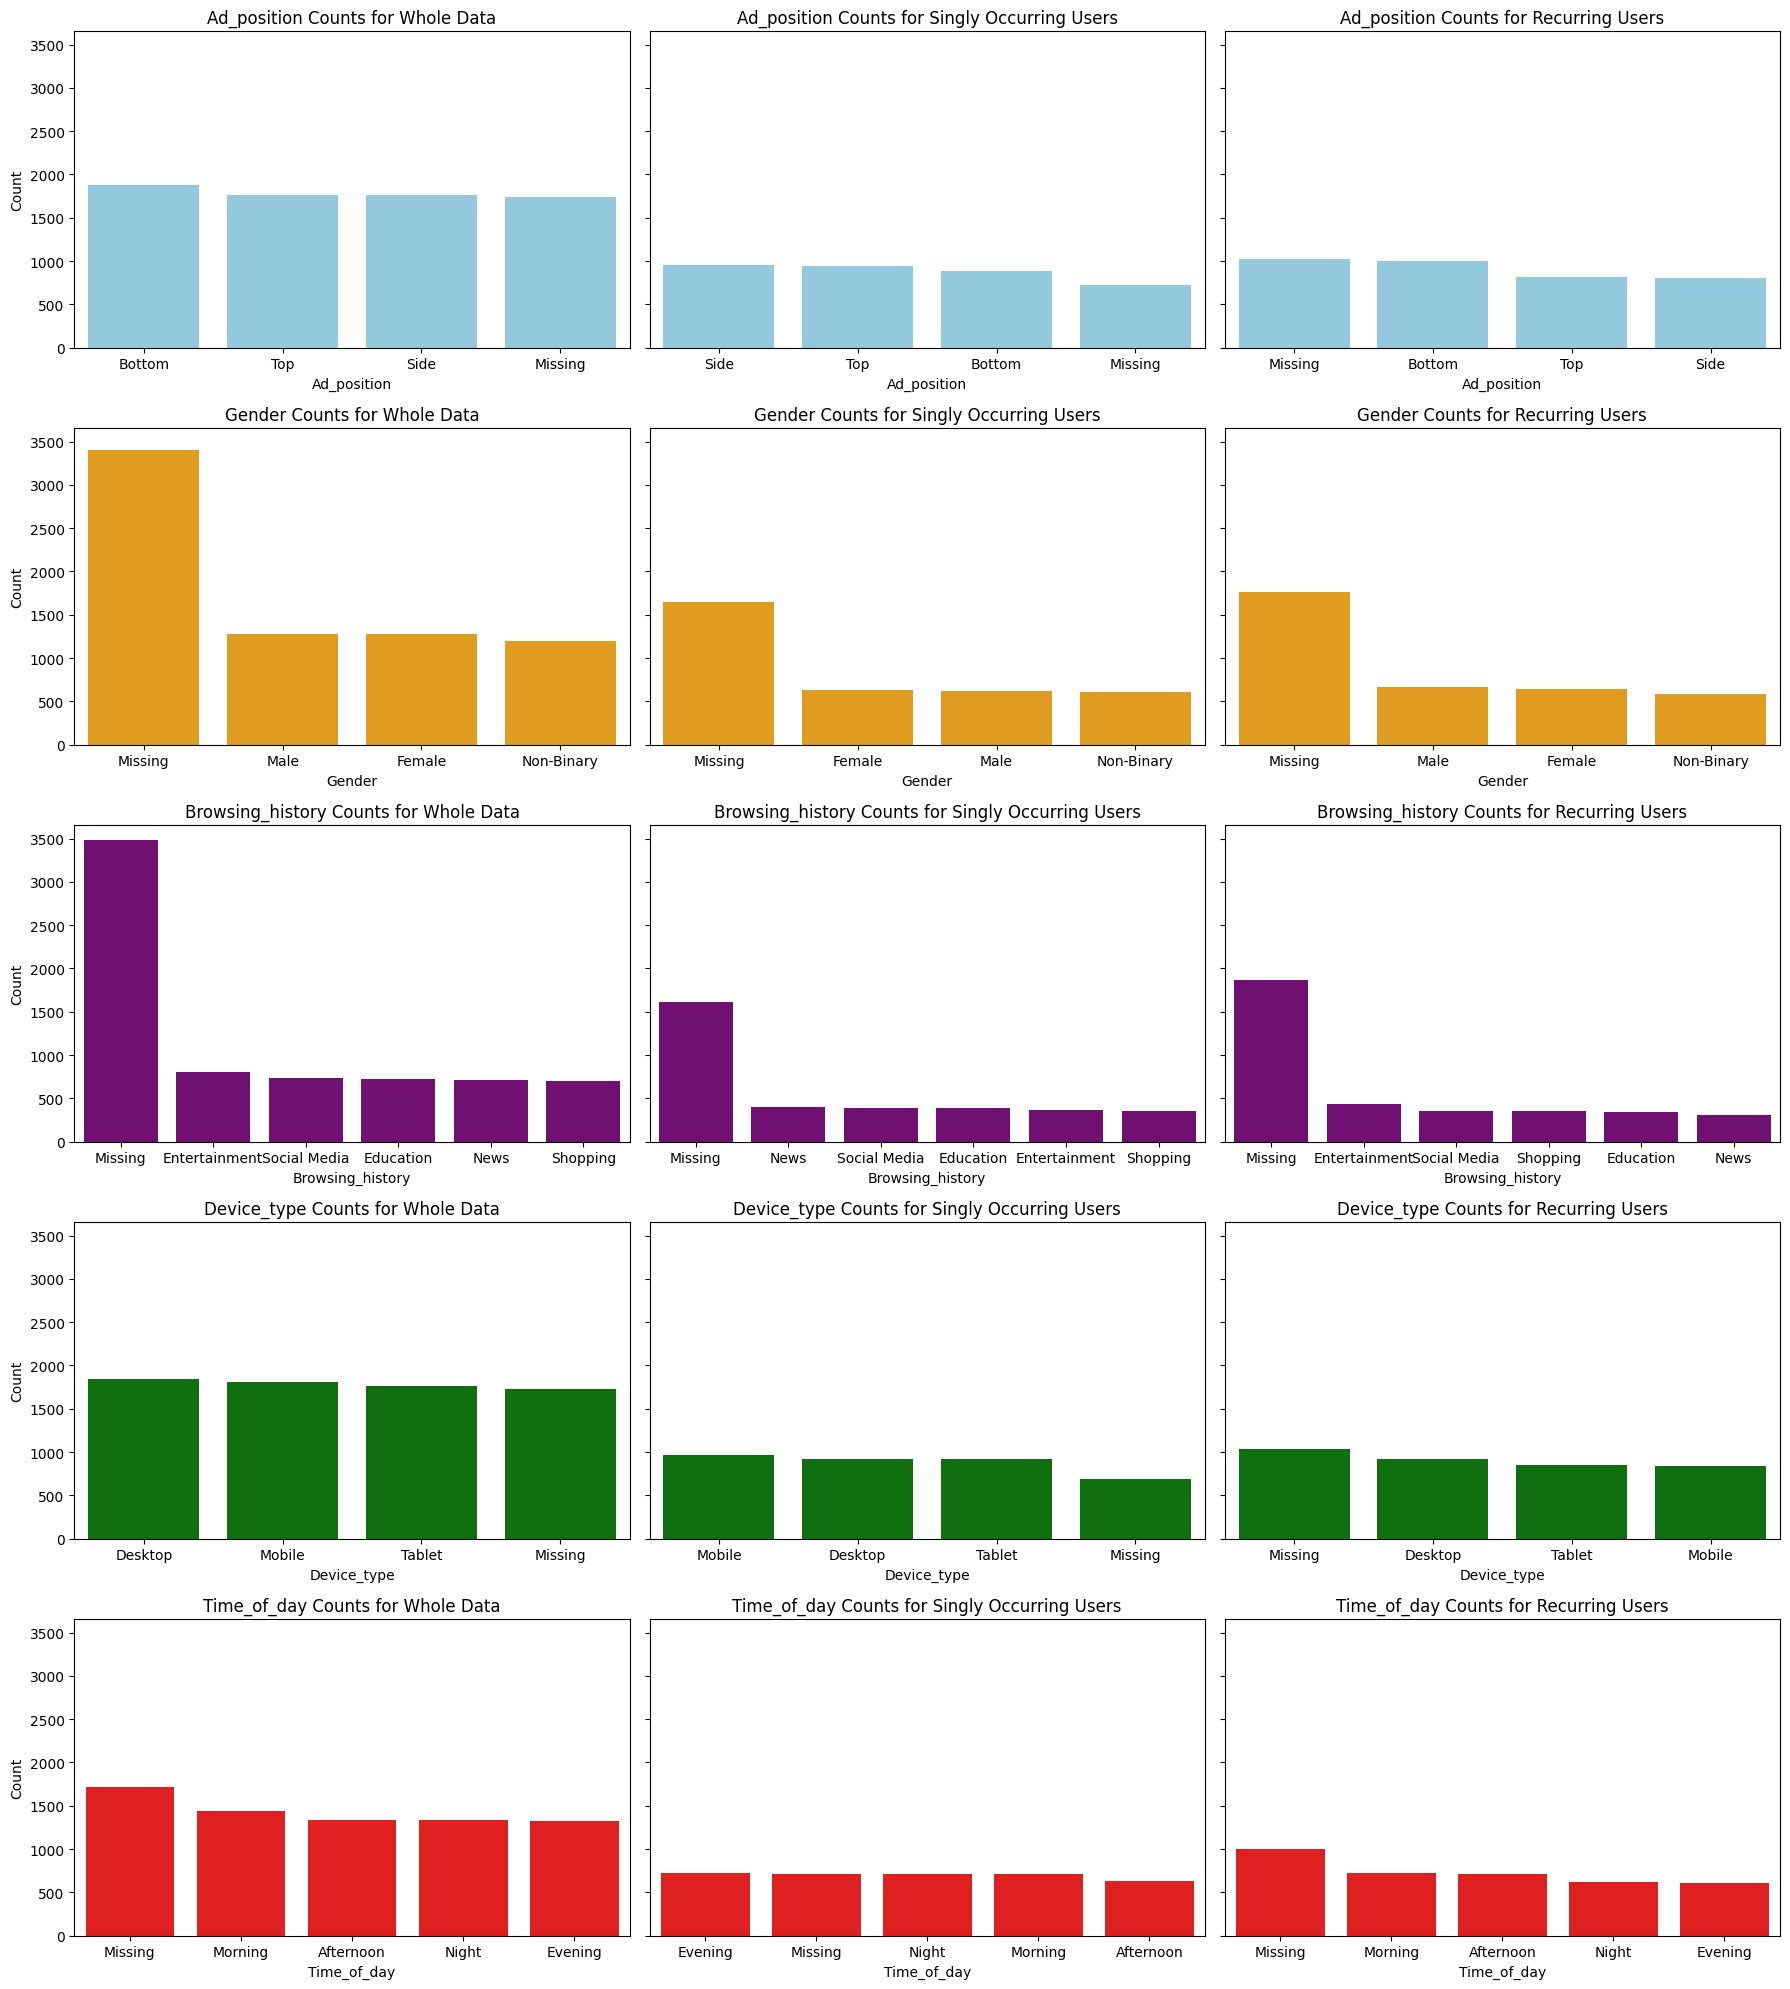

In [ ]:
dataframes = [adclicks, single_users, recurring_users]
dataframe_names = ["Whole Data", "Singly Occurring Users", "Recurring Users"]
features = list(set(categorical).intersection(set(adclicks.columns)))
colors = ["skyblue", "orange", "purple", "green", "red"]

plot_barplots(dataframes, dataframe_names, features, colors)
plot_show("categorical_barplots")

## Distributions of Numerical Features

Evaluating the distribution of numerical features.

In [18]:
# Information of numerical features
adclicks.describe()

,id,age,click
count,7147.000000,3671.000000,7147.000000
mean,5041.774731,40.339417,0.510284
std,2865.705550,13.215682,0.499929
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5180.000000,40.000000,1.000000
75%,7454.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [27]:
# Function to create plot grid of boxplots
def plot_boxplots(dataframes, dataframe_names, features, colors, group_by=None):
    '''A function that outputs a grid of boxplots.'''
    
    num_df = len(dataframes)
    num_features = len(features)
    
    # Each figure will be 6 by 4
    fig, axes = plt.subplots(num_features, num_df, figsize=(6*num_df, 4*num_features), sharey=True)
    
    # Iterate through and plot figures
    for i, ax in enumerate(axes.flatten()):
        # Gather data
        df = dataframes[i % num_df]
        df_name = dataframe_names[i % num_df]
        feature = features[i // num_df]
        feature_name = feature.capitalize()
        color = colors[i // num_df]
        
        # Create barplot
        sns.boxplot(x=group_by, y=feature, data=df, color=color, ax=ax)
        
        # Extra plot details
        ax.set_title(f"{feature_name} Boxplot for {df_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel(group_by)


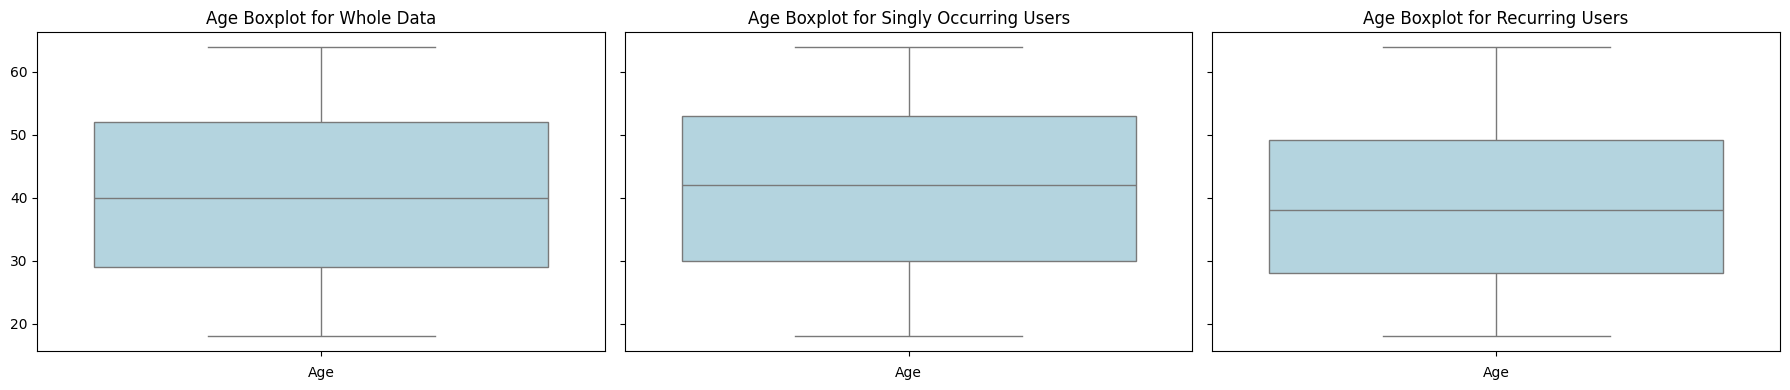

<Figure size 640x480 with 0 Axes>

In [33]:
# Boxplot of age with user category by occurrence
features = ["age"]
colors = ["lightblue"]

plot_boxplots(dataframes, dataframe_names, features, colors)
plot_show("age_boxplots")

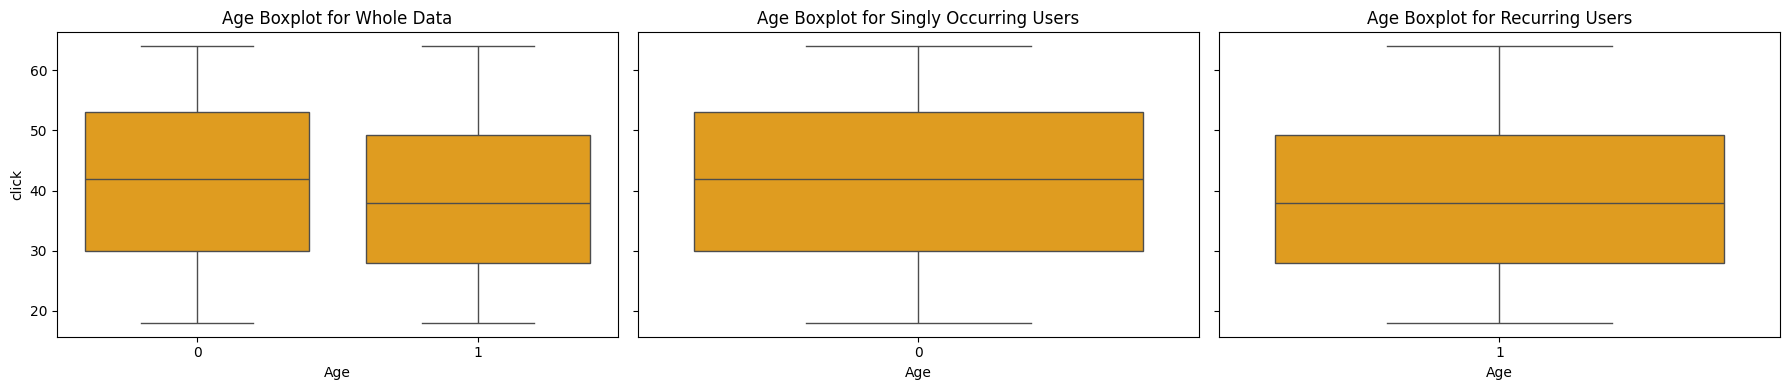

<Figure size 640x480 with 0 Axes>

In [35]:
# Boxplot of age vs  with user category by occurrence
features = ["age"]
colors = ["orange"]


plot_boxplots(dataframes, dataframe_names, features, colors, "click")
plot_show("age_vs_click_boxplots")